In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Set up plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = [12, 8]

# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Connect to the database
conn = sqlite3.connect('../data/database/economic_data.db')

print("Libraries imported and database connected!")

Libraries imported and database connected!


In [2]:
# Load main comparison data
economic_data = pd.read_sql_query("SELECT * FROM economic_comparison", conn)
print("Economic comparison data loaded with shape:", economic_data.shape)

# Load what-if data
what_if_data = pd.read_sql_query("SELECT * FROM affordability_comparison", conn)
print("Affordability comparison data loaded with shape:", what_if_data.shape)

# Load decade summary
decade_data = pd.read_sql_query("SELECT * FROM decade_summary", conn)
print("Decade summary data loaded with shape:", decade_data.shape)

# Display first few rows of main dataset
economic_data.head()

Economic comparison data loaded with shape: (40, 7)
Affordability comparison data loaded with shape: (3, 5)
Decade summary data loaded with shape: (5, 6)


,year,median_home_price,median_household_income,consumer_price_index,home_price_to_income_ratio,inflation_adjusted_home_price,inflation_adjusted_income
0,1984,79950.0,22420.0,103.933333,3.566012,199123.000762,55839.120414
1,1985,84275.0,23620.0,107.600000,3.567951,202742.270737,56823.167426
2,1986,92025.0,24900.0,109.691667,3.695783,217165.087537,58760.235585
3,1987,104700.0,26060.0,113.616667,4.017652,238540.680871,59373.162784
4,1988,112225.0,27230.0,118.275000,4.121373,245614.766804,59595.367343


In [3]:
# Basic statistics for our main data
economic_data.describe()

,year,median_home_price,median_household_income,consumer_price_index,home_price_to_income_ratio,inflation_adjusted_home_price,inflation_adjusted_income
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2003.500000,210855.000000,45320.000000,190.263298,4.488328,274822.585437,60952.596950
std,11.690452,94163.795202,15022.113614,54.079638,0.585501,47781.873718,3554.034468
min,1984.000000,79950.000000,22420.000000,103.933333,3.566012,199123.000762,55839.120414
25%,1993.750000,129443.750000,32005.000000,147.287500,3.988155,237360.710389,58549.380531
50%,2003.500000,203887.500000,43825.000000,186.454167,4.410683,262254.673639,60434.022091
75%,2013.250000,271112.500000,53607.500000,233.892562,4.990122,313176.774986,62812.566766
max,2023.000000,432950.000000,80610.000000,304.704167,5.805176,382986.543818,69560.767950


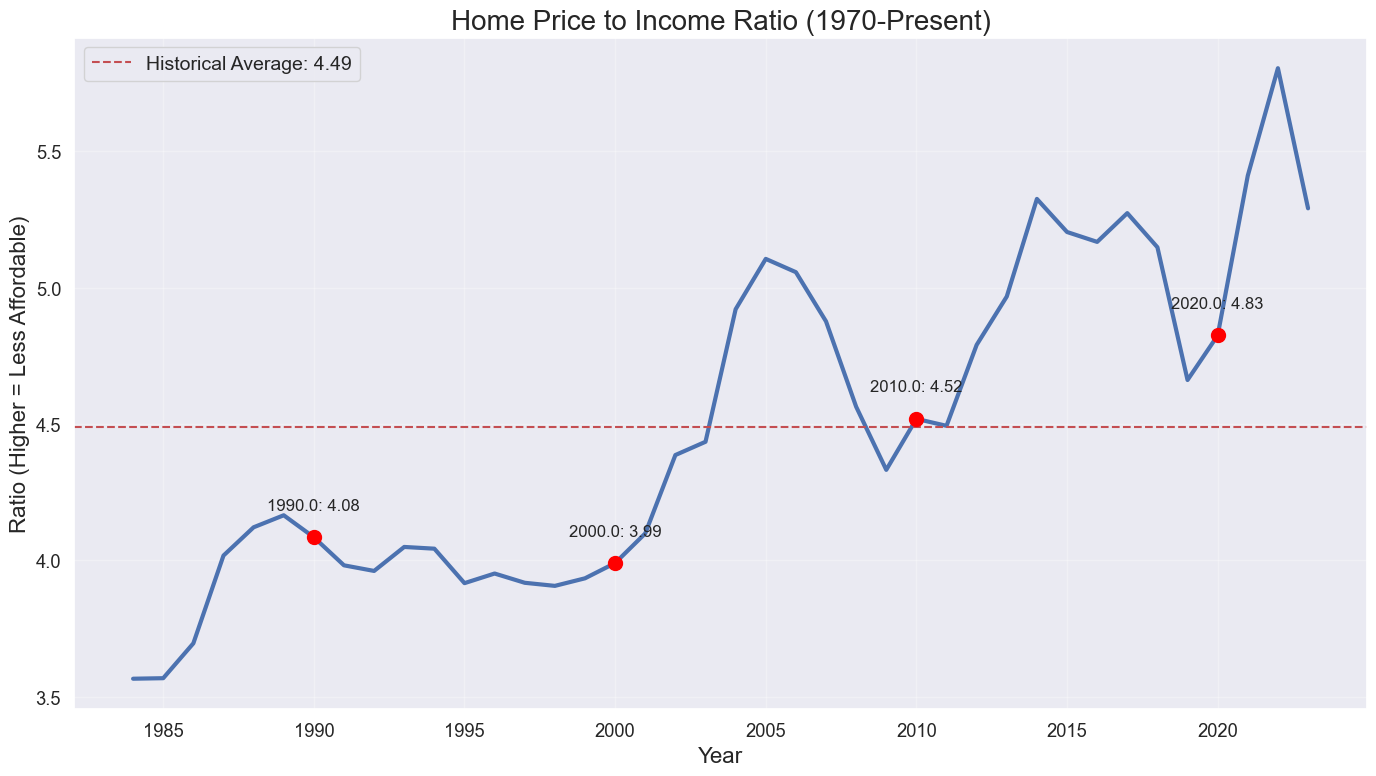

In [4]:
# Plot housing price to income ratio over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='home_price_to_income_ratio', data=economic_data, linewidth=3)
plt.title('Home Price to Income Ratio (1970-Present)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Ratio (Higher = Less Affordable)', fontsize=16)
plt.grid(True, alpha=0.3)

# Add historical average line
avg_ratio = economic_data['home_price_to_income_ratio'].mean()
plt.axhline(y=avg_ratio, color='r', linestyle='--',
            label=f'Historical Average: {avg_ratio:.2f}')

# Highlight some important decades
decades = [1970, 1980, 1990, 2000, 2010, 2020]
decade_points = economic_data[economic_data['year'].isin(decades)]
plt.scatter(decade_points['year'], decade_points['home_price_to_income_ratio'],
            color='red', s=100, zorder=5)

# Add labels for decades
for _, row in decade_points.iterrows():
    plt.text(row['year'], row['home_price_to_income_ratio'] + 0.1,
             f"{row['year']}: {row['home_price_to_income_ratio']:.2f}",
             fontsize=12, ha='center')

plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('../data/processed/housing_affordability_trend.png', dpi=300, bbox_inches='tight')
plt.show()

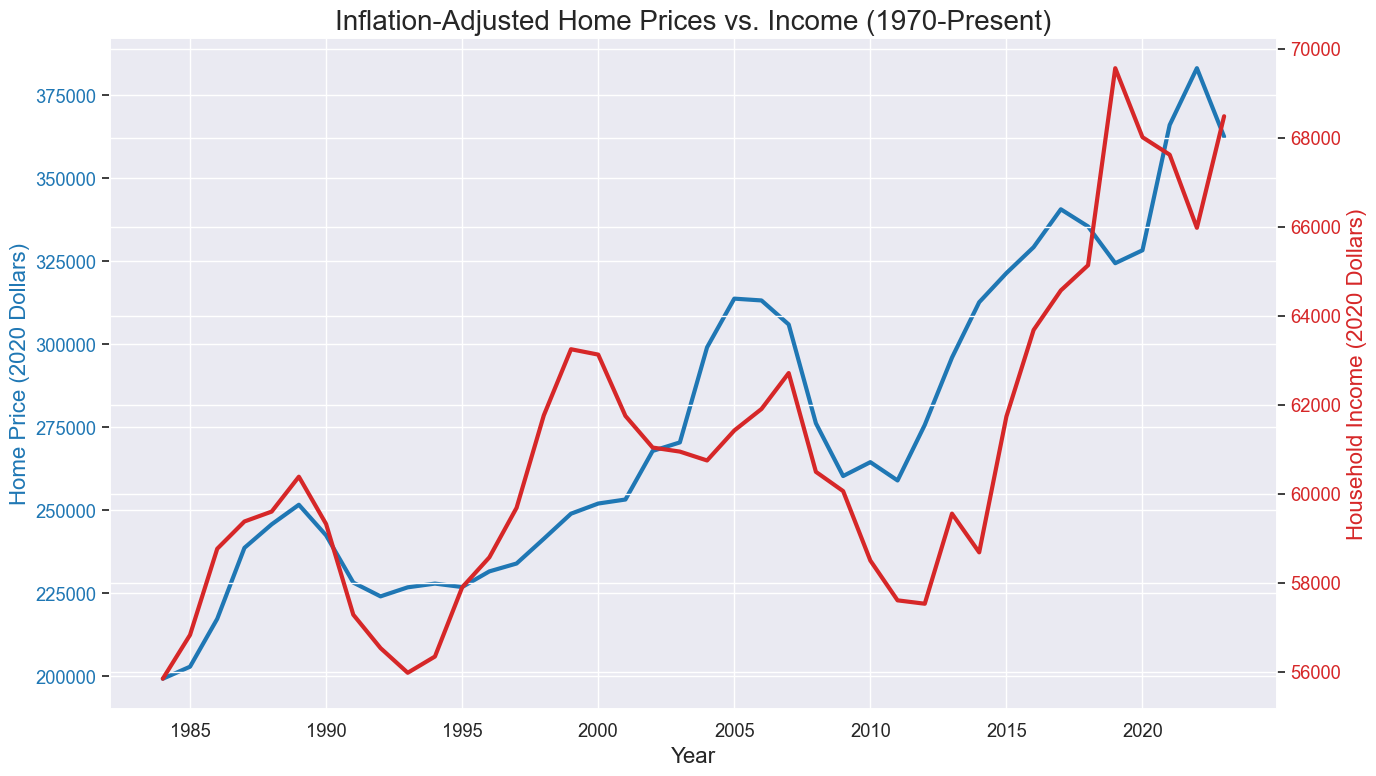

In [5]:
# Plot inflation-adjusted prices
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Home Price (2020 Dollars)', color=color, fontsize=16)
ax1.plot(economic_data['year'], economic_data['inflation_adjusted_home_price'],
         color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Household Income (2020 Dollars)', color=color, fontsize=16)
ax2.plot(economic_data['year'], economic_data['inflation_adjusted_income'],
         color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Inflation-Adjusted Home Prices vs. Income (1970-Present)', fontsize=20)
fig.tight_layout()
plt.savefig('../data/processed/inflation_adjusted_values.png', dpi=300, bbox_inches='tight')
plt.show()

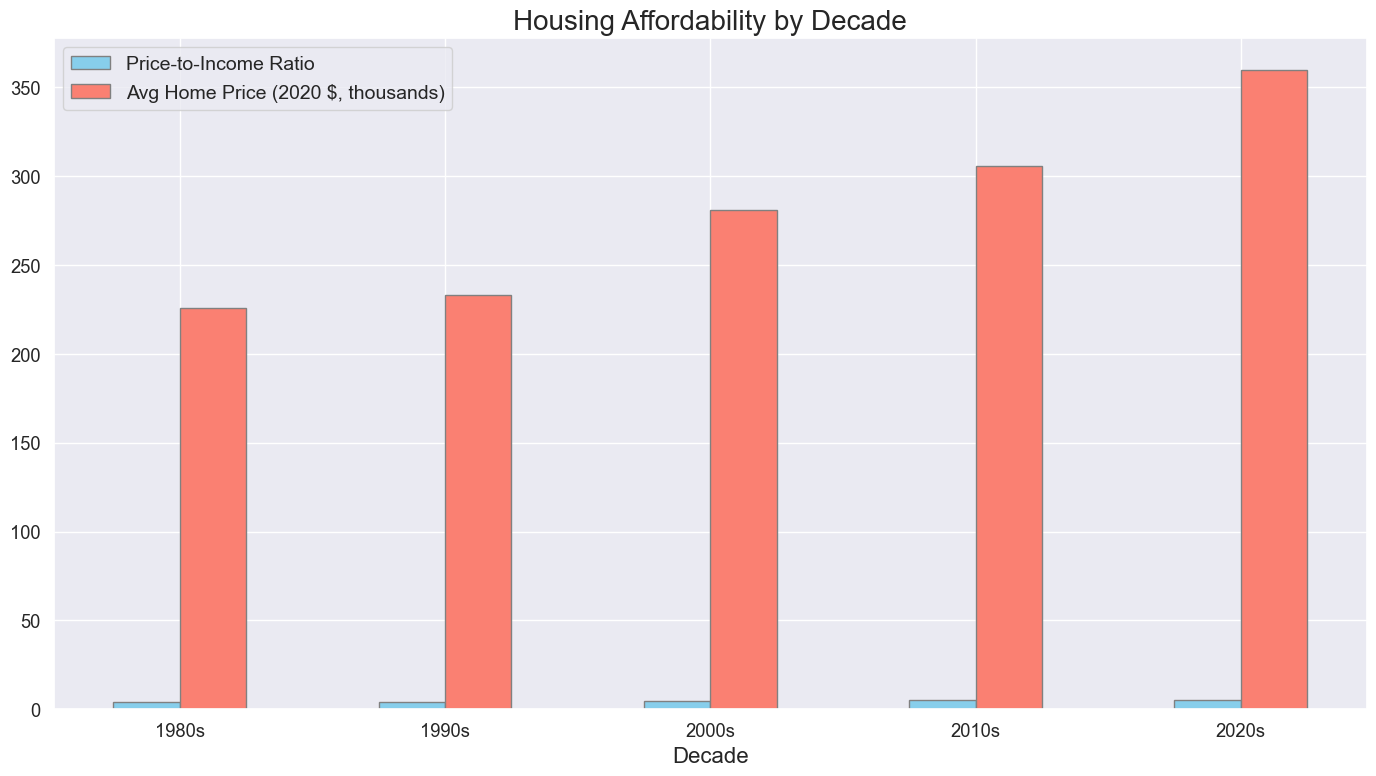

In [6]:
# Create bar chart comparing decades
plt.figure(figsize=(14, 8))

# Set width of bar
barWidth = 0.25

# Set positions of bars on X axis
r1 = np.arange(len(decade_data))
r2 = [x + barWidth for x in r1]

# Create bars
plt.bar(r1, decade_data['avg_price_to_income_ratio'], width=barWidth,
        edgecolor='gray', label='Price-to-Income Ratio', color='skyblue')
plt.bar(r2, decade_data['avg_adj_home_price']/1000, width=barWidth,
        edgecolor='gray', label='Avg Home Price (2020 $, thousands)', color='salmon')

# Add labels
plt.xlabel('Decade', fontsize=16)
plt.title('Housing Affordability by Decade', fontsize=20)
plt.xticks([r + barWidth/2 for r in range(len(decade_data))],
           [f"{decade}s" for decade in decade_data['decade']])
plt.legend(fontsize=14)

plt.tight_layout()
plt.savefig('../data/processed/decade_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

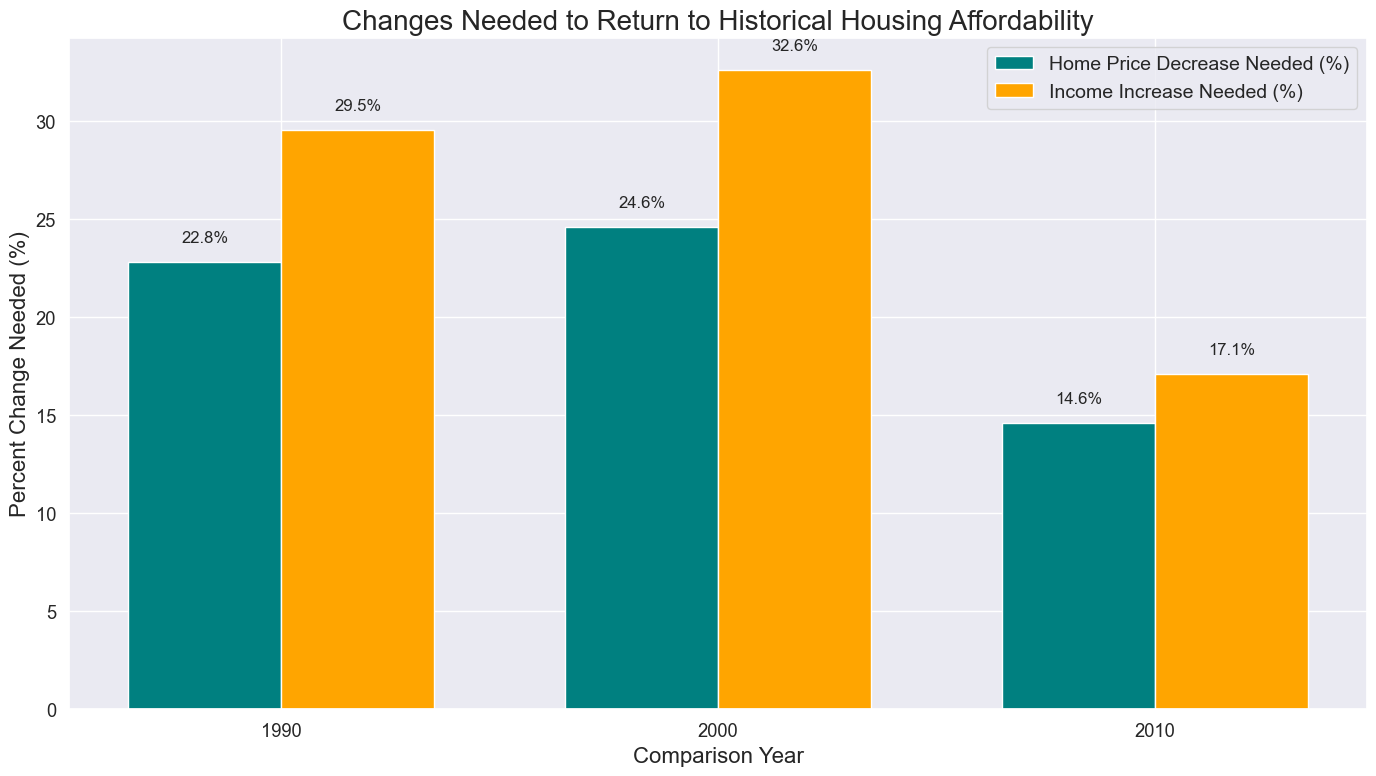

In [7]:
# Create visualization of what would need to happen
plt.figure(figsize=(14, 8))

# Set up bar positions
bar_positions = np.arange(len(what_if_data))
bar_width = 0.35

# Create bars
plt.bar(bar_positions - bar_width/2, what_if_data['home_price_decrease_needed'],
        width=bar_width, label='Home Price Decrease Needed (%)', color='teal')
plt.bar(bar_positions + bar_width/2, what_if_data['income_increase_needed'],
        width=bar_width, label='Income Increase Needed (%)', color='orange')

# Add labels and formatting
plt.xlabel('Comparison Year', fontsize=16)
plt.ylabel('Percent Change Needed (%)', fontsize=16)
plt.title('Changes Needed to Return to Historical Housing Affordability', fontsize=20)
plt.xticks(bar_positions, what_if_data['comparison_year'])
plt.legend(fontsize=14)

# Add text labels on bars
for i, v in enumerate(what_if_data['home_price_decrease_needed']):
    plt.text(i - bar_width/2, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

for i, v in enumerate(what_if_data['income_increase_needed']):
    plt.text(i + bar_width/2, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('../data/processed/affordability_changes_needed.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Save the main datasets to CSV for Power BI import
economic_data.to_csv('../data/processed/economic_comparison.csv', index=False)
what_if_data.to_csv('../data/processed/affordability_comparison.csv', index=False)
decade_data.to_csv('../data/processed/decade_summary.csv', index=False)

# Print key insights
latest_year = economic_data['year'].max()
earliest_year = economic_data['year'].min()

latest_ratio = economic_data[economic_data['year'] == latest_year]['home_price_to_income_ratio'].values[0]
earliest_ratio = economic_data[economic_data['year'] == earliest_year]['home_price_to_income_ratio'].values[0]

percent_change = ((latest_ratio - earliest_ratio) / earliest_ratio) * 100

print(f"\nKEY INSIGHTS:")
print(f"1. Housing affordability has worsened by {percent_change:.1f}% since {earliest_year}")
print(f"2. The current price-to-income ratio is {latest_ratio:.2f} compared to {earliest_ratio:.2f} in {earliest_year}")

# Find decade with best affordability
best_decade = decade_data.loc[decade_data['avg_price_to_income_ratio'].idxmin()]
print(f"3. The most affordable decade was the {best_decade['decade']}s with a ratio of {best_decade['avg_price_to_income_ratio']:.2f}")

# Calculate what would need to happen to return to best decade
price_decrease = (1 - (best_decade['avg_price_to_income_ratio'] / latest_ratio)) * 100
income_increase = ((latest_ratio / best_decade['avg_price_to_income_ratio']) - 1) * 100

print(f"4. To return to {best_decade['decade']}s affordability:")
print(f"   - Housing prices would need to decrease by {price_decrease:.1f}%")
print(f"   - OR incomes would need to increase by {income_increase:.1f}%")

# Close database connection
conn.close()

print("\nAnalysis complete! Data exported for Power BI.")


KEY INSIGHTS:
1. Housing affordability has worsened by 48.4% since 1984
2. The current price-to-income ratio is 5.29 compared to 3.57 in 1984
3. The most affordable decade was the 1980.0s with a ratio of 3.86
4. To return to 1980.0s affordability:
   - Housing prices would need to decrease by 27.1%
   - OR incomes would need to increase by 37.2%

Analysis complete! Data exported for Power BI.
